<img src="img/title_card.png" width=100% align="center">

### Introduction: Why this project?

As part of the Star Wars generation (or a [xennial](https://www.merriam-webster.com/words-at-play/words-were-watching-xennial)) I completely missed the Harry Potter craze in the early 2000s.  I saw the movies and the lines at bookstores, but wasn't that invested in the story myself.

However, I do know lots of people who love the series, who consistently told me what a great, feminist character Hermione Granger is.  

So, when my son started to get interested in <i>Harry Potter</i> I was excited to read it to him.  The series was very clearly centered around Harry but it had a major female character who is known for being smart and resourceful.  Sharing stories with major characters who do not look like my extremely white little boy has always been a priority for me as part of my mission to help him become a man who is thoughtful about the privileges he has and empathetic with others who do not share the same advantages.

But, as I read the books for the first time with him as a bedtime story, I noticed something hadn't expected.  

Subtle but prevalent sexism. 

Some of it was in how women and girls were characterized.  Hermione is a "bossy know-it-all", Aunt Petuntia has a "shrill voice".  Minerva McGonnigal is written a sharp, tight-lipped teacher while Mrs. Weasley is a nagging, frumpy housewife.  I found myself skipping over some passages because I didn't want my kid to hear about women being referred to as hags or cows with no repreive.

At first I thought I was being overly sensitive.  Maybe I was just reading too much into these things?

Channeling my inner Hermione, I did the equivalent of going to the library.  Turns out, I am not the first one to notice this.

The sexism critique of the Harry Potter novels is not a new one - many people have (written)[https://www.bustle.com/articles/136244-the-5-least-feminist-moments-in-harry-potter] excellent articles about Ron's treatment of Hermoine, the portrayl of other female characters as cold or incompetent or promiscuous.  

This post details the code behind my May 2018 [talk](http://codelandconf.com/speakers/eleanor-stribling/) of the same title for [Codeland](http://codelandconf.com/) in New York City.


### Setting the hypothesis & scope

Because my talk was just 15 minutes, I needed to have a pretty specific scope for this project, at least this first iteration of it. I contrained the scope in four ways:
- focus on the three protagonists rather than try to analyze every character; 
- analyze only the narrative, since it wasn't so much about how the characters speak, but how JK Rowling characterized women and girls that I had noticed to start with; 
- work with verbs and adverbs only - as they are used in describing every character pretty consistently throughout the books, adjectives less so and are harder to isolate; and
- use "out of the box" tools as much as possible to keep the explanations straightforward and accessible in a 15 minute talk.


The hypothesis I decided to explore:

<b>Hermione will be described using terms associated with negative female characteristics that are not used for Harry and Ron.</b>


### Approaching the problem with code

My approach boiled down into three steps:
1. Prep the text for analysis in Python
2. Isolate and group the parts of the text that need to be analyzed
3. Perform the analysis


A few tried and true tools were used for this project:
- [Python](https://www.python.org/)
- [Jupyter Notebook](http://jupyter.org/)
- [Natural Language Processing Toolkit (NLTK)](http://www.nltk.org/)
- [PyPlot](https://matplotlib.org/api/pyplot_api.html)

The table below breaks down what the tools are and why I chose each of them:


<img src ="img/tools_table.png" width=70%>



#### Step 1: Prep the text for analysis in Python

The very first step is to get a copy of all of the books to analyze - I was able to get some .txt files, so that is reflected in the code below.

No matter what format your files are in, however, the next step is the same: go from that file format to a string of characters that we can process with Python and NLTK.   This is done with the `read_file` function, below.

To keep what comes next clear, we'll only read in just one book of the series (#1) unless otherwise stated.  In the way I've structured my code, this is indicated with the `num` variable that's passed in. 

In [1]:
def read_file(num):
    text = ''
    # In this code, the files are named 'hp' then the book number - i.e. `hp1.txt` - and stored in a folder 
    # called `corpus`. To run the code as it is, you'll need to recreate this schema or alter the code to 
    # fit the path you create.
    with open('corpus/hp'+ str(num) + '.txt', 'rt') as file_in:
        for line in file_in:
            text = text + line
    return text

# here we create a variable called book_content and make it equal to the value of the read_file function for book 1
book_content = read_file(1)

In [2]:
print("Let's see what's in the book_content variable.  We'll work with this example through most of this post.")
print(book_content[149756:149980])
print()
print('*' * 20)
print("Looks good!  We can also double check the format of this variable is a string...")
print(type(book_content))
print("And how many characters it has...")
print(len(book_content))

Let's see what's in the book_content variable.  We'll work with this example through most of this post.


Harry looked at Ron, and was relieved to see by his stunned face that he hadn't learned all the course books by heart either.

"I'm Ron Weasley," Ron muttered.

"Harry Potter," said Harry.

"Are you really?" said Hermione.

********************
Looks good!  We can also double check the format of this variable is a string...
<class 'str'>
And how many characters it has...
439676


Now that we've read the text in and we have a giant string, we need to tokenize the text.

Tokenizing might sound fancy, but what it really means is turning a long string into a list of words; it's also called splitting the string on the spaces.  For example:

`"Are you really?" said Hermione. ` from our `book_content` variable above would become:

`['"', 'Are', 'you', 'really', '?', '"', 'said', 'Hermione', '.']`

We'll import a function of NLTK called `word_tokenize` and write a function called `tokenize_lower_text` around it.  We'll pass in our `book_content` variable, the big string of every character from Book 1.  In this function, we'll also put every word into lower case, since computers are very literal and will interpret `Hermione` and `hermione` as two different words.

In most text processing projects you'd also remove punctuation and maybe stop words (aka common words).  We need the punctuation (you'll see why in a moment) and the stop words don't hurt our analysis, so I've left them in.

In [3]:
from nltk import word_tokenize

def tokenize_lower_text(book_content):
    tokenized = word_tokenize(book_content)
    tokenized = [word.lower() for word in tokenized]
    return tokenized

tokenized = tokenize_lower_text(book_content)

In [4]:
# Let's check our output - we should see a list of lower case words, same text as before.
print(tokenized[33746:33800])

['harry', 'looked', 'at', 'ron', ',', 'and', 'was', 'relieved', 'to', 'see', 'by', 'his', 'stunned', 'face', 'that', 'he', 'had', "n't", 'learned', 'all', 'the', 'course', 'books', 'by', 'heart', 'either', '.', '``', 'i', "'m", 'ron', 'weasley', ',', "''", 'ron', 'muttered', '.', '``', 'harry', 'potter', ',', "''", 'said', 'harry', '.', '``', 'are', 'you', 'really', '?', "''", 'said', 'hermione', '.']


That's it for step 1!  Now that we've gotten the text ready for processing, we need to seperate out the parts we need and group them to prep for the analysis.  Let's do that.

#### Step 2: Isolate and group the parts of the text that need to be analyzed

Now the real fun begins!  

Remember how we want to seperate dialog from narration?  Here's where our punctuation gets important.

As you can see in the text above, our opening and closing quotes look like this: `'``'` and `"''"`. This is a really helpful pattern when it comes to splitting dialog from narrative.  

That's exactly what the `parse_text` function below does, and returns a list of dialog and a list of narrative.  It will:
- take our `tokenized` variable as an input
- loop through that list of words
   - if the word is not a quotation mark, append it to a list called `current`
   - if the word is an open quote (e.g. `'``'` which is the value of the `open_q` variable in the code below):
      - append the contents of `current` to the `parsed_narrative` list, clear `current`
      - change the value of the found_q variable from `False` to `True`
      - while `found_q` is True, append each word to the `current` list
        - when you hit a close_q (closing quote):
        - append it to `current`
        - append `current` to `parsed_dialog`
        - clear the `current` list
        - switch the `found_q` variable to false, which gets us out of the while loop and into the case where the text will be added to the narration variable until we get to a quotation mark again.
        
This will return two lists, one of dialog, one of narration, that will contain lists of each passage of tokenized dialog or narrative.  These individual passages are each a list of their own, but can contain multiple sentences.  For example, the beginning of book one has a pretty big chunk of narration before the dialog starts, and all of that would be one item in the list.
      

In [5]:
def parse_text(t):
    open_q = '``'
    close_q = "''"
    found_q = False # this will be used to break the while loop below
    # current will hold words until an open quote is found
    current = []
    
    parsed_dialog = [] 
    parsed_narrative = []
    length = len(t)
    i = 0

    while i < length:
        word = t[i]
        
        if word != open_q and word != close_q:
            current.append(word)

        elif word == open_q or word == close_q:
            parsed_narrative.append(current)

            current = []
            current.append(word)

            while found_q == False and i < length-1:
                i += 1
                if t[i] != close_q:
                    current.append(t[i])
                else:
                    current.append(t[i])
                    parsed_dialog.append(current)
                    current = []
                    found_q = True
        
        found_q = False
        i += 1
        
    return (parsed_dialog, parsed_narrative)


parsed_dialog, parsed_narrative = parse_text(tokenized)

In [6]:
# Let's take a look at what our original selection looks like now.
print("parsed_narrative:", parsed_narrative[711:715])
print()
print("parsed_dialog:",parsed_dialog[711:714])

parsed_narrative: [['ron', 'warned', 'harry', '.'], ['ron', 'picked', 'up', 'a', 'green', 'bean', ',', 'looked', 'at', 'it', 'carefully', ',', 'and', 'bit', 'into', 'a', 'corner', '.'], ['they', 'had', 'a', 'good', 'time', 'eating', 'the', 'every', 'flavor', 'beans', '.', 'harry', 'got', 'toast', ',', 'coconut', ',', 'baked', 'bean', ',', 'strawberry', ',', 'curry', ',', 'grass', ',', 'coffee', ',', 'sardine', ',', 'and', 'was', 'even', 'brave', 'enough', 'to', 'nibble', 'the', 'end', 'off', 'a', 'funny', 'gray', 'one', 'ron', 'would', "n't", 'touch', ',', 'which', 'turned', 'out', 'to', 'be', 'pepper', '.', 'the', 'countryside', 'now', 'flying', 'past', 'the', 'window', 'was', 'becoming', 'wilder', '.', 'the', 'neat', 'fields', 'had', 'gone', '.', 'now', 'there', 'were', 'woods', ',', 'twisting', 'rivers', ',', 'and', 'dark', 'green', 'hills', '.', 'there', 'was', 'a', 'knock', 'on', 'the', 'door', 'of', 'their', 'compartment', 'and', 'the', 'round-faced', 'boy', 'harry', 'had', 'pass

Now we have our narration isolated in the `parsed_narrative` list.  We won't need the `parsed_dialog` list for this project.  

Now that we have this list, we need to split the longer passages into single sentences.  This will make analyzing the text a little easier. Let's look at an example of how long these passages of narration can get.

In [7]:
parsed_dialog, parsed_narrative = parse_text(tokenized)

print("Sample of narrative list:", parsed_narrative[0])

Sample of narrative list: ['chapter', 'one', 'the', 'boy', 'who', 'lived', 'mr.', 'and', 'mrs.', 'dursley', ',', 'of', 'number', 'four', ',', 'privet', 'drive', ',', 'were', 'proud', 'to', 'say', 'that', 'they', 'were', 'perfectly', 'normal', ',', 'thank', 'you', 'very', 'much', '.', 'they', 'were', 'the', 'last', 'people', 'you', "'d", 'expect', 'to', 'be', 'involved', 'in', 'anything', 'strange', 'or', 'mysterious', ',', 'because', 'they', 'just', 'did', "n't", 'hold', 'with', 'such', 'nonsense', '.', 'mr.', 'dursley', 'was', 'the', 'director', 'of', 'a', 'firm', 'called', 'grunnings', ',', 'which', 'made', 'drills', '.', 'he', 'was', 'a', 'big', ',', 'beefy', 'man', 'with', 'hardly', 'any', 'neck', ',', 'although', 'he', 'did', 'have', 'a', 'very', 'large', 'mustache', '.', 'mrs.', 'dursley', 'was', 'thin', 'and', 'blonde', 'and', 'had', 'nearly', 'twice', 'the', 'usual', 'amount', 'of', 'neck', ',', 'which', 'came', 'in', 'very', 'useful', 'as', 'she', 'spent', 'so', 'much', 'of', 

`split_sent` is a helper function (below) that will take the `parsed_narrative` list and split it into sentences. 

We also want to group the sentences by protagonist.  Because prepositions (he, she, they, etc) are difficult to attribute to a noun with certainty in a programmatic way, I stuck with sentences where protagonists were referred to by name.  The function called `protagonist` below creates a dictionary where the keys are the names of the protagonists, and the values are the tokenized sentences that mention them.   We'll discard all of the other narrative.


In [8]:
from itertools import groupby as gb

p_list = ['harry', 'ron', 'hermione']

def split_sent(t):
    sent_list = []
    for sent in t:
        k = [list(sent) for i, sent in gb(sent, lambda item: item=='.')]
        for i in k:
            if len(i) > 1:
                sent_list.append(i)
    return (sent_list)

def protagonist(n, p_list):
    protagonist_narrative = {}
    for p in p_list:
        protagonist_narrative[p] = []

    for i in n:
        for word in i:
            
            if word in p_list:
                if word == p_list[0]:
                    protagonist_narrative['harry'].append(i)
                if word == p_list[1] :
                    protagonist_narrative['ron'].append(i)
                if word == p_list[2]:
                    protagonist_narrative['hermione'].append(i)
                    
    return protagonist_narrative
        

narrative_split_sent = split_sent(parsed_narrative)
protagonist_dict = protagonist(narrative_split_sent, p_list)

In [9]:
# Let's print the first few entries from the  key to see what it looks like.
for p in p_list:
        print("Sample from %s key:" % p.title())
        print(protagonist_dict[p][:5])

Sample from Harry key:
[['he', 'was', 'sure', 'there', 'were', 'lots', 'of', 'people', 'called', 'potter', 'who', 'had', 'a', 'son', 'called', 'harry'], ['come', 'to', 'think', 'of', 'it', ',', 'he', 'was', "n't", 'even', 'sure', 'his', 'nephew', 'was', 'called', 'harry'], ['she', 'eyed', 'his', 'cloak', 'suddenly', 'as', 'though', 'she', 'thought', 'he', 'might', 'be', 'hiding', 'harry', 'underneath', 'it'], ['dumbledore', 'took', 'harry', 'in', 'his', 'arms', 'and', 'turned', 'toward', 'the', 'dursleys', "'", 'house'], ['he', 'bent', 'his', 'great', ',', 'shaggy', 'head', 'over', 'harry', 'and', 'gave', 'him', 'what', 'must', 'have', 'been', 'a', 'very', 'scratchy', ',', 'whiskery', 'kiss']]
Sample from Ron key:
[['said', 'ron'], ['said', 'ron', 'again'], ['mumbled', 'ron'], ['said', 'harry', 'and', 'ron'], ['ron', 'blurted', 'out']]
Sample from Hermione key:
[['said', 'hermione'], ['said', 'hermione'], ['he', 'was', 'just', 'taking', 'harry', 'through', 'the', 'finer', 'points', 'of

##### Step 3: Perform the analysis
Now that we've got all of the narrative passages mentioning the protagonists organized, we can use NLTK's classification function to categorize words by the part of speech they represent.

We'll use the `pos_tag` function of NLTK to hone in on the verbs and adjectives in each sentence.  The `pos_tag` function takes in a tokenized word and returns a tuple of the word and a code for how it was classified.  For example, 'NNP' means the word has been tagged by NLTK as a proper noun, 'VB' means the word has been tagged as a verb.  So "Harry" in the sentence "Harry is Petunia's nephew." would come back as `('Harry', 'NNP')`.  

You can find a full list [here](https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/), but in the next steps we'll be focused primarily on adjectives, verbs and nouns.

We will import the `pos_tag` function from NLTK and tag the words in a new helper function called `tagged_text` that returns an updated list.

We'll call this function inside another one called `parse_tagged` that will return a dictionary with keys for each protagonist followed by lists of tagged words.

In [10]:
from nltk import pos_tag

def tagged_text(i):
    tagged = [pos_tag(word) for word in i]
    return tagged

In [11]:
def parse_tagged(protagonist_dict):
    tagged_dict = {}
    
    for k, v in protagonist_dict.items():
        tagged_dict[k] = tagged_text(v)
    return tagged_dict
    
# Call the function and save the results in a variable called tagged_dict.
tagged_dict = parse_tagged(protagonist_dict)

# Let's see what these look like by printing the first two sentences in each key.
for p in p_list:
        print("%s : " % p.title())
        print(tagged_dict[p][:2])

Harry : 
[[('he', 'PRP'), ('was', 'VBD'), ('sure', 'RB'), ('there', 'EX'), ('were', 'VBD'), ('lots', 'NNS'), ('of', 'IN'), ('people', 'NNS'), ('called', 'VBN'), ('potter', 'NN'), ('who', 'WP'), ('had', 'VBD'), ('a', 'DT'), ('son', 'NN'), ('called', 'VBN'), ('harry', 'NN')], [('come', 'VB'), ('to', 'TO'), ('think', 'VB'), ('of', 'IN'), ('it', 'PRP'), (',', ','), ('he', 'PRP'), ('was', 'VBD'), ("n't", 'RB'), ('even', 'RB'), ('sure', 'JJ'), ('his', 'PRP$'), ('nephew', 'NN'), ('was', 'VBD'), ('called', 'VBN'), ('harry', 'NN')]]
Ron : 
[[('said', 'VBD'), ('ron', 'NN')], [('said', 'VBD'), ('ron', 'NN'), ('again', 'RB')]]
Hermione : 
[[('said', 'VBD'), ('hermione', 'NN')], [('said', 'VBD'), ('hermione', 'NN')]]


`tagged_dict` contains all of the words in every sentence involving each protagonist.  The function below, `descriptor_verbs_adverbs` is going to pull out only verbs and adverbs.  However, we can't just pull out every verb and adverb in a sentence that matches the protagonist's name - we won't know for sure that the words are being used to describe them.

So, the function below seeks out specific patterns of verbs and adverbs around the protagonist's name that we know will be referring to them.  

These are:
<img src="img/verb_adverb.png" width=80%>



In [12]:
from collections import Counter

def descriptor_verbs_adverbs(td):
    descriptor_words = {}
    descriptor_count = {}
    
    for k, v in td.items():
        # Create a key in the dictionary for the protagonist.
        descriptor_words[k] = []
        
        # Loop through each sentence in the list
        for s in v:
            for i in range(len(s)):
                
                # Cases of VERB - NOUN (e.g. "said Ron")
                if 'VB' in s[i][1]: 
                    try:
                        if s[i+1][0] == k:
                            descriptor_words[k].append(s[i][0])
                            
                            # Subset of cases where VERB - NOUN is followed by an ADVERB (e.g. "said Ron angrily")
                            try:
                                if 'RB' in s[i+2][1]:
                                    descriptor_words[k].append(s[i+2][0])
                            except:
                                continue
                            
                    except:
                        continue
                        
                # Cases of NOUN - VERB (e.g. "Hermione explained")
                if 'NN' in s[i][1]: 
                    try:
                        if 'VB' in s[i+1][1]:
                            descriptor_words[k].append(s[i+1][0])
                            cnt[word] += 1
                            # Subset of cases where NOUN - VERB is followed by an ADVERB (e.g. 
                            #"Hermione explained patiently")
                            try:
                                if 'RB' in s[i+2][1]:
                                    descriptor_words[k].append(s[i+2][0])
                            except:
                                continue
                            
                    except:
                        continue
        
        descriptor_count[k] = Counter(descriptor_words[k])
      
        
    return (descriptor_words, descriptor_count)

descriptor_words, descriptor_count= descriptor_verbs_adverbs(tagged_dict)

Now we have all of the descriptor words for each character for this book.  Let's visualize them with some word clouds!

In [13]:
import matplotlib.pyplot as plt
# from PIL import Image
import wordcloud
from wordcloud import WordCloud
#generate the word cloud with parameters

wc = WordCloud(background_color="white", 
               max_words=50, 
               min_font_size =5, 
               max_font_size=40, 
               relative_scaling = 0.4, 
               normalize_plurals= True)

fig_sz = (20,20)

#harry
print ("*" * 20, "Harry", "*" * 20)
wc.generate(' '.join(descriptor_words['harry']))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

plt.show()

#ron
print ("*" * 20, "Ron", "*" * 20)
wc.generate(' '.join(descriptor_words['ron']))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

#hermione
print ("*" * 20, "Hermione", "*" * 20)
wc.generate(' '.join(descriptor_words['hermione']))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

******************** Harry ********************


<Figure size 2000x2000 with 1 Axes>

******************** Ron ********************


<Figure size 2000x2000 with 1 Axes>

******************** Hermione ********************


<Figure size 2000x2000 with 1 Axes>

Now that we've seen all of the verbs and adverbs used for each character, let's get a step closer to addressing the hypothesis by boiling these lists down to the words that are used ONLY to describe each protagonist and not the other two.

In [14]:
def character_exclusive(dc, char):

    char_excl = []
    other_two = []
    
    for k, v in dc.items():
        if k != char:
            words = list(v.keys())
            other_two.extend(words)
            
    other_two = set(other_two)
    
    for word in list(dc[char].keys()):
        if word not in other_two:
            char_excl.append(word)
    
    
    return char_excl
    

In [15]:
# This function calls character_exclusive and turns the results into a list we can use to make the word cloud

def only_char_list(dc, char):
    excl_words = character_exclusive(dc, char)
    word_cloud_list = []
    for word in excl_words:
        multiplier = dc[char][word]
        word_cloud_list.extend([word for x in range(multiplier)])

    return word_cloud_list

harry_excl = only_char_list(descriptor_count, 'harry')
ron_excl = only_char_list(descriptor_count, 'ron')
hermione_excl = only_char_list(descriptor_count, 'hermione')

******************** Harry ********************


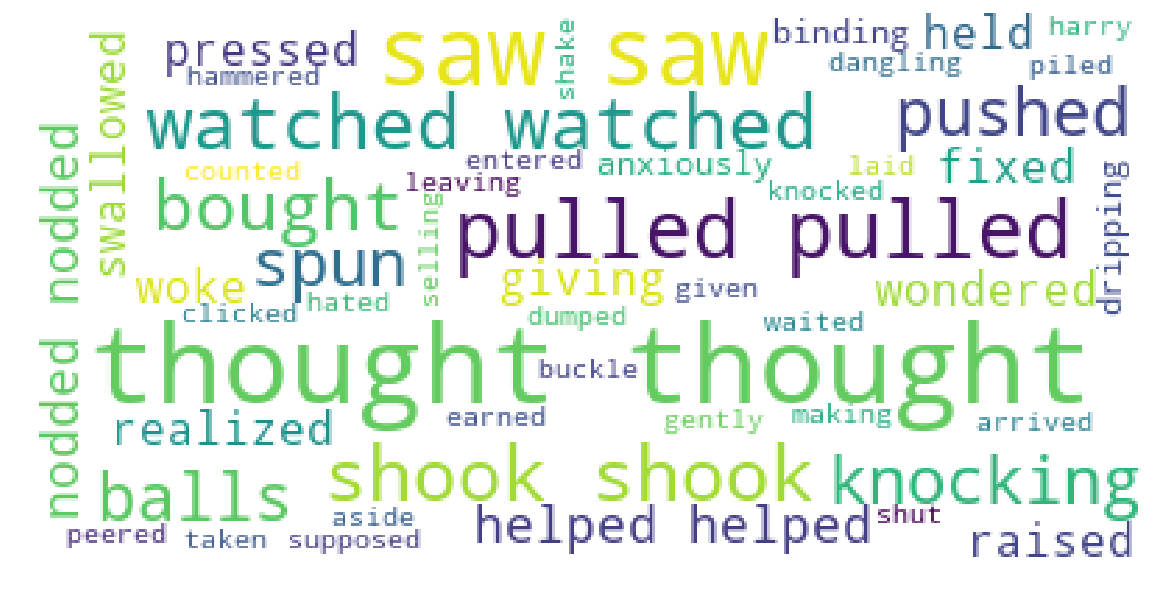

******************** Ron ********************


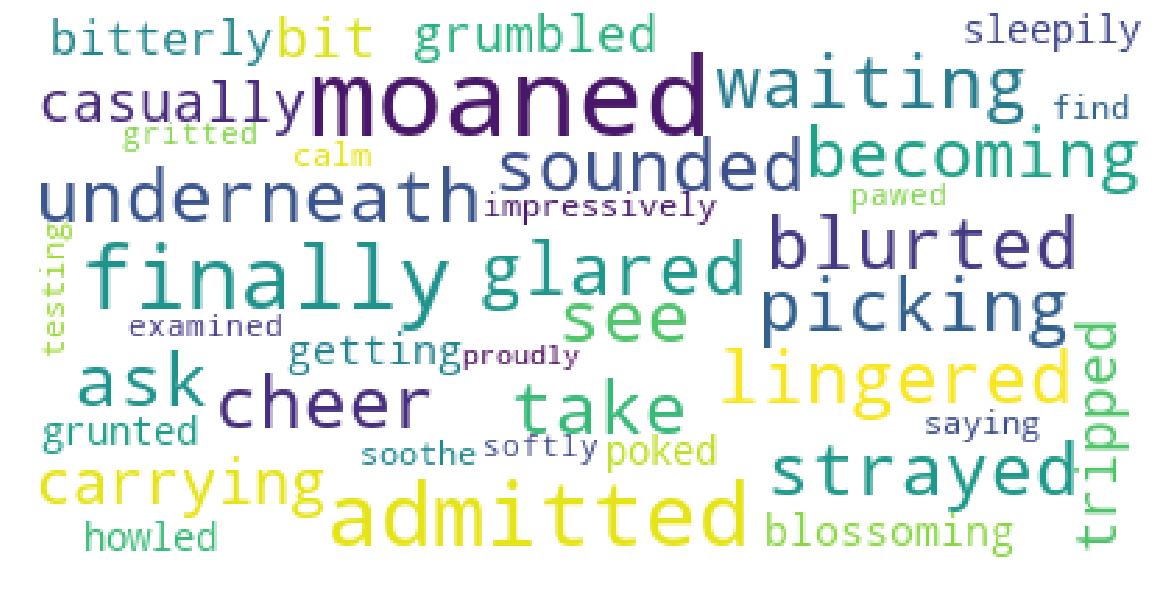

******************** Hermione ********************


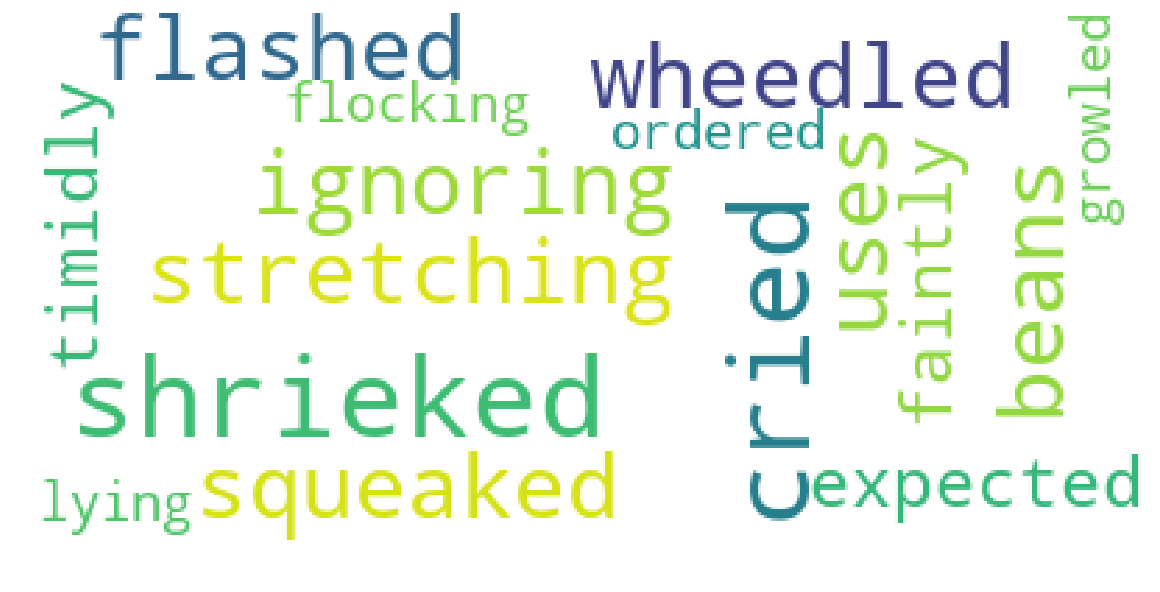

In [16]:
# and now for the word clouds!

#harry only
print ("*" * 20, "Harry", "*" * 20)
wc.generate(' '.join(harry_excl))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

plt.show()

#ron only
print ("*" * 20, "Ron", "*" * 20)
wc.generate(' '.join(ron_excl))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

#hermione
print ("*" * 20, "Hermione", "*" * 20)
wc.generate(' '.join(hermione_excl))
plt.figure(figsize=fig_sz)
plt.imshow(wc)
plt.axis("off")

#Show the wordcloud
plt.show()

In [17]:
# Finally, here are the top 10 words for each

# Harry
print("Harry's top 10 exclusive descriptors in this book with frequencies:")
print(Counter(harry_excl).most_common(10))
print()

# Ron
print("Ron's top 10 exclusive descriptors in this book with frequencies:")
print(Counter(ron_excl).most_common(10))
print()

# Hermione
print("Hermione's top 10 exclusive descriptors in this book with frequencies:")
print(Counter(hermione_excl).most_common(10))
print()

Harry's top 10 exclusive descriptors in this book with frequencies:
[('thought', 17), ('saw', 11), ('pulled', 7), ('watched', 6), ('shook', 6), ('helped', 5), ('nodded', 5), ('bought', 4), ('knocking', 4), ('pushed', 4)]

Ron's top 10 exclusive descriptors in this book with frequencies:
[('moaned', 4), ('just', 2), ('finally', 2), ('admitted', 2), ('again', 1), ('blurted', 1), ('so', 1), ('cheer', 1), ('strayed', 1), ('waiting', 1)]

Hermione's top 10 exclusive descriptors in this book with frequencies:
[('cried', 2), ('shrieked', 2), ('ignoring', 1), ('stretching', 1), ('wheedled', 1), ('flashed', 1), ('beans', 1), ('squeaked', 1), ('uses', 1), ('expected', 1)]



### Conclusions

It really isn’t just me — Hermione is described at times by Rowling with words that are applied almost exclusively to women and girls, words that are not used when she writes about Harry and Ron.

The image below shows word clouds for each of the 7 books, representing frequency of action words that are used in that book to describe Hermione, but not Harry and Ron.

<img src="img/hermione_wordclouds.png">

Notice that Hermione is frequently described as squealing, crying shrieking, squeaking, doing things breathlessly, cooly and timidly. Sure, some of the words are innocuous, but many are not, especially when they are only being used to describe the female character, and when that female character is smart and resourceful.

Also, teenaged boys are squeaky too. Yet they are not described that way.

Sure, you may say, but what about the words used exclusively to describe Harry and Ron?

I looked at those too, and it doesn’t make me feel much better, to be honest.

In the table below, rows represent Harry, Ron and Hermione, columns are for each of the 7 books. In each cell, I’ve listed the top 10 “exclusive” verbs and adverbs for that character as word, frequency . The numbers may look low, but keep in mind I gave up some volume for accuracy.

So, what about Harry and Ron’s unique descriptors, what can those tell us? I think it tells us what’s special about each of these characters relative to one another.

<img src="img/character_table.png">

Here’s what I take from this data:

- Harry’s unique descriptors are often about his observations and thoughts. This makes complete sense: he is the main character in all of the books, and Rowling tells the story largely through him.
- Ron’s unique descriptors are often about his behavior. Irritation, bellowing, blurting, grumpy. Because, that’s Ron’s personality.
- Hermione’s unique descriptors often don’t establish her as the “greatest witch of her age”, more knowledgeable and clever than her exceptional friends. Instead, her unique words slot her squarely as a traditional female character. Especially in Book 7 when she’s owning some really bad witches and wizards.

Let's be clear: I don’t hate Harry Potter, and I didn’t stop reading the books to my son. I’m still partial to the galaxy far, far away, but I’ve become a Potter fan. On Pottermore I found out my house is Ravenclaw (obvs), and I went out and purchased a t-shirt to let the world know this. My patronus is a mole, which is unfortunate when I was hoping for wolf or lynx or lioness or something more clearly badass, but I have learned to accept it. When my son has screen time, I suggest a Harry Potter movie. Totally for him, of course.

Talking to someone about this project, they told me that they had always found Hermione “low key annoying” and hadn’t really stopped to think why.

I think this is why.

Even the best writer can’t undo all of their biases when creating female characters. Hermione might be the greatest witch (or wizard, let’s be real) of her age, but our inherent biases let this coexist with narrative that paints her in a way that reinforces stereotypes about women. These biases so engrained, we barely notice they are being tripped.

So, what would I like you to take from this? Always watch for bias, even in the literature and media that you love, and when you see it, name it, acknowledge it, and point it out. Especially to the kids in your life.